In [1]:
from datetime import datetime, timedelta

from stock_data_repo import StockDataRepo
from backtest import Backtester, BacktestResult
from strategies import MinVarianceAuxiliaryData, min_variance_portfolio
import numpy as np
import matplotlib.pylab as plt

In [263]:
backtester = Backtester(datetime(2019, 1, 1, 0, 0, 0))

In [264]:
POTENTIAL_LONGS = [
    #"T", "VZ", "MSI", "TMUS", "CSCO", "GRMN"
    "VZ","T","MSI","TMUS","CSCO","GRMN","ANET","LUMN","GLIBA","FFIV","LBTYK","JNPR","LITE","CIEN","IRDM","LBTYA","VIAV","ACIA","VG","VSAT","SHEN","USD","COMM","TDS","NTCT","LILAK","UI","SATS","NTGR","CBB","PLT","INSG","HLIT","EXTR","ADTN","ATNI","RBBN","USM","CMTL","ATEX","CNSL","ORBC","CAMP","AAOI","GSAT"
]
SHORT_CANDIDATES = [
    "QQQ", 
    "SPY", # Large cap.
    "IWF", # Growth.
    "IWM", # Small cap.
    "MTUM", # Momentum.
    "VLUE", # Value.
    "USMV", # Low volatility.
    "SDY", # Dividend.
]
r = {}
for long_ticker in POTENTIAL_LONGS:
    print("processing ticker", long_ticker)
    r[long_ticker] = backtester.backtest([long_ticker], SHORT_CANDIDATES, min_variance_portfolio)

processing ticker VZ
[*********************100%***********************]  9 of 9 completed
processing ticker T
[*********************100%***********************]  1 of 1 completed
processing ticker MSI
[*********************100%***********************]  1 of 1 completed
processing ticker TMUS
[*********************100%***********************]  1 of 1 completed
processing ticker CSCO
[*********************100%***********************]  1 of 1 completed
processing ticker GRMN
[*********************100%***********************]  1 of 1 completed
processing ticker ANET
[*********************100%***********************]  1 of 1 completed
processing ticker LUMN
[*********************100%***********************]  1 of 1 completed


/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_s

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_s

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_s

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_s

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_s

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_s

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_s

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_s

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_

/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: invalid value encountered in double_scalars
  })
/Users/jameszhao/trading_tools/backtest.py:87: RuntimeWarning: divide by zero encountered in double_

processing ticker GLIBA
[*********************100%***********************]  1 of 1 completed
processing ticker FFIV
[*********************100%***********************]  1 of 1 completed
processing ticker LBTYK
[*********************100%***********************]  1 of 1 completed
processing ticker JNPR
[*********************100%***********************]  1 of 1 completed
processing ticker LITE
[*********************100%***********************]  1 of 1 completed
processing ticker CIEN
[*********************100%***********************]  1 of 1 completed
processing ticker IRDM
[*********************100%***********************]  1 of 1 completed
processing ticker LBTYA
[*********************100%***********************]  1 of 1 completed
processing ticker VIAV
[*********************100%***********************]  1 of 1 completed
processing ticker ACIA
[*********************100%***********************]  1 of 1 completed
processing ticker VG
[*********************100%***********************]  1 of

KeyboardInterrupt: 

<ipython-input-265-823374426c35>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


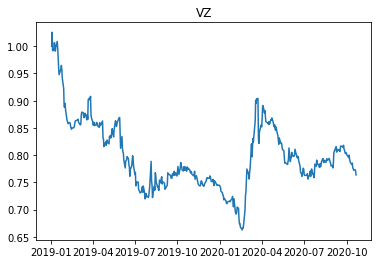

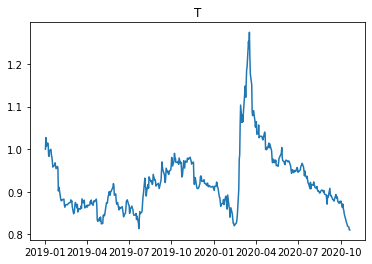

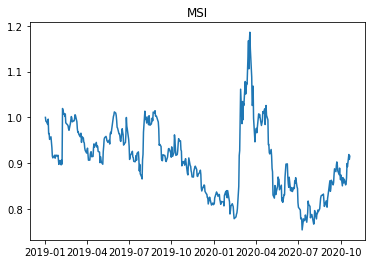

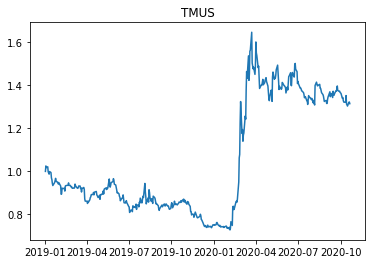

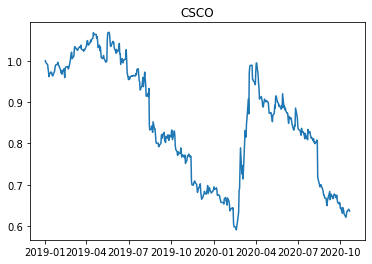

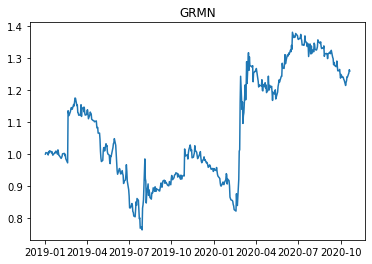

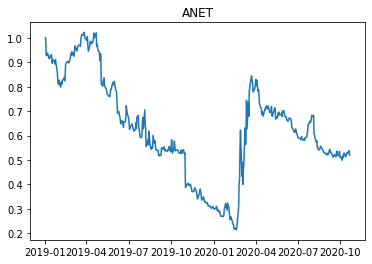

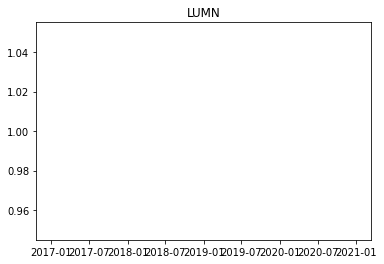

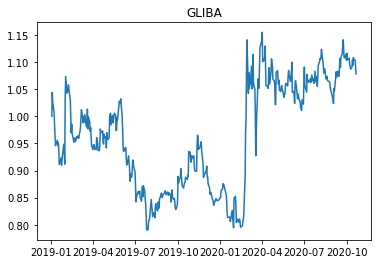

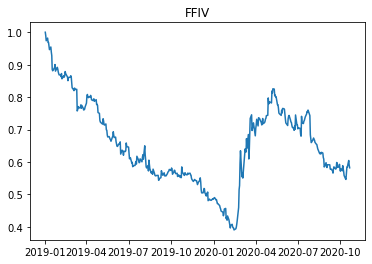

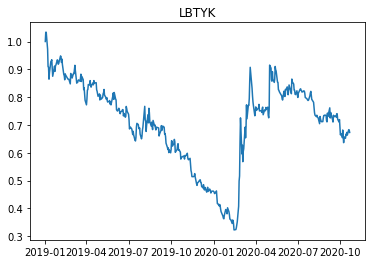

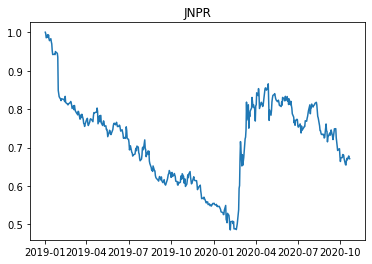

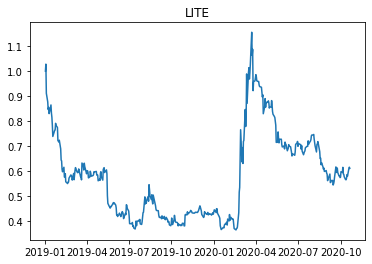

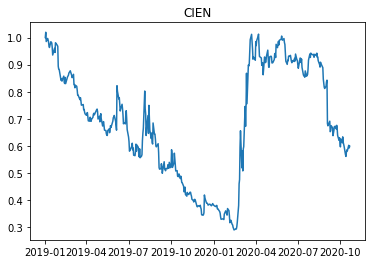

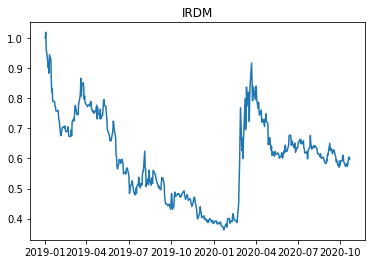

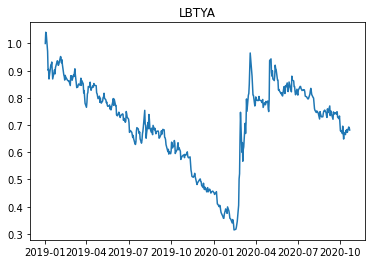

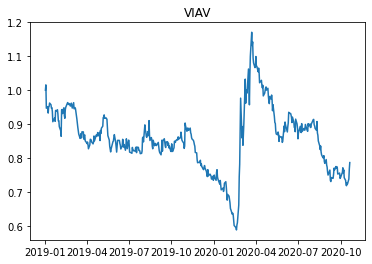

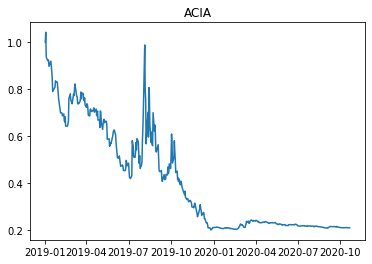

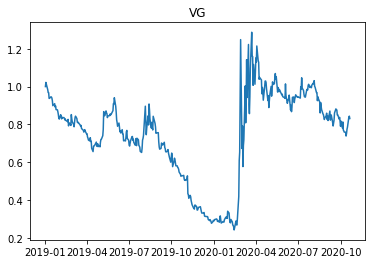

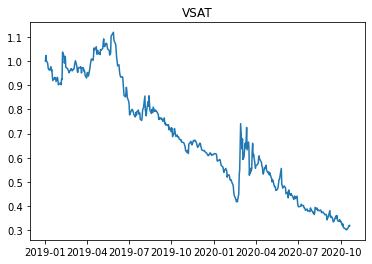

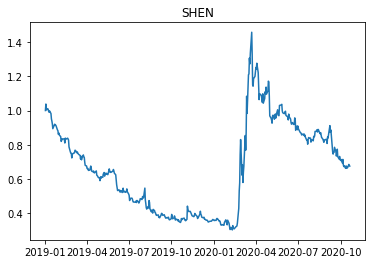

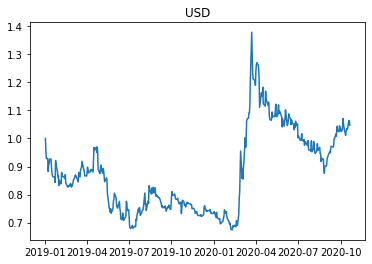

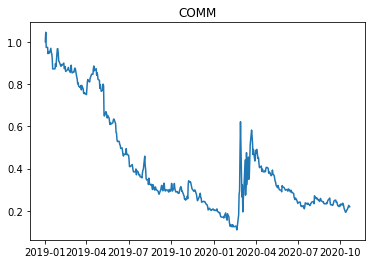

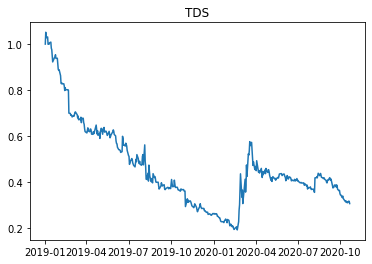

<Figure size 432x288 with 0 Axes>

In [265]:
for ticker, data in r.items():
    cum_returns = (data.returns_history+1).cumprod()
    plt.title(ticker)
    plt.plot(cum_returns)
    plt.figure()

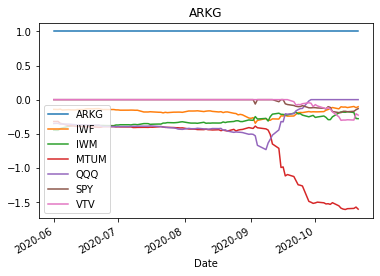

In [242]:
for ticker, data in r.items():
    data.allocation_history.plot(title=ticker)

    

In [5]:
from strategies import min_variance_portfolio

## Does variance minimization strip out alpha?

This example shows that variance minimization will prioritize a lower variance, at the expense of returns.

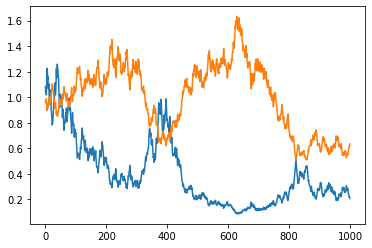

In [66]:
returns_1 = np.random.uniform(-.1, .1, size=1000) # No returns but lower variance.
returns_2 = -1*returns_1/2.0
returns_1 = returns_1 # + .001
returns_2 = returns_2 # - .001
plt.plot(np.cumprod((1+returns_1)))
plt.plot(np.cumprod((1+returns_2)))


In [62]:
import pandas as pd

r = min_variance_portfolio(None, pd.DataFrame({"a": returns_1, "b": returns_2}))
r[0]

OrderedDict([('a', 0.33348), ('b', 0.66652)])

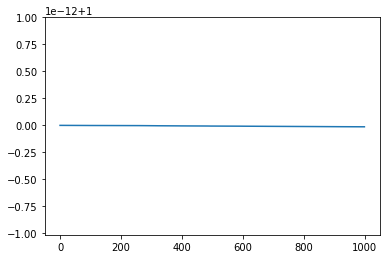

In [67]:
w_1 = r[0]['a']
w_2 = r[0]['b']

w_1 = 1
w_2 = 2


plt.plot(np.cumprod(1+ w_1*returns_1 + w_2*returns_2))